<a href="https://colab.research.google.com/github/jvitorbarros15/Regression_Analysis_Insurance_Costs/blob/main/Linear_Regression_Insurance_Charge_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal
## The Goal Of This Project Is To Predict The **Insurance Charges** Of Individuals Based On Their Personal And Lifestyle Attributes Using Regression Models


## 1. Importing The Necessary Libraries


In [2]:
# Import libraries for data handling and visualization

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## 2. Loading The Dataset


In [3]:
# Load the dataset using kagglehub

import kagglehub


path = kagglehub.dataset_download("mirichoi0218/insurance")

print(os.listdir(path))

['insurance.csv']


In [30]:
df = pd.read_csv(os.path.join(path, "insurance.csv"))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3. Data Inspection



In [31]:
# Checking For Null Values

df.isna().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [32]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [34]:
df["age"].unique()


array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [35]:
# Checking The Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4. Data Cleaning & Encoding

In [36]:
df_clean = df.copy()
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
# Mapping The Features To Values

Binary_Sex = {"male": 0, "female": 1}
Binary_Smoker = {"yes": 1, "no": 0}
Region_Map = {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}

df_clean["sex"] = df_clean["sex"].map(Binary_Sex)
df_clean["smoker"] = df_clean["smoker"].map(Binary_Smoker)
df_clean["region"] = df_clean["region"].map(Region_Map)

df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [39]:
df_clean.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


##5. Exploratory Data Analysis (EDA)

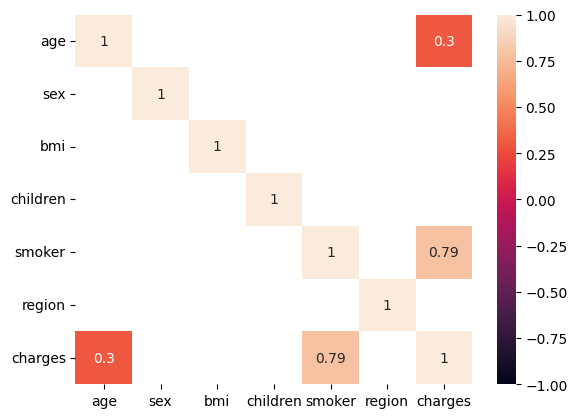

In [40]:
# Checking How Much Does Each Feature Impacts The Target (Charges)

corr_matrix = df_clean.corr()

filtered_corr = corr_matrix.where((corr_matrix >= 0.29) | (corr_matrix <= -0.29))


sns.heatmap(filtered_corr, annot=True, cmap="rocket", vmin=-1, vmax=1)
plt.show()

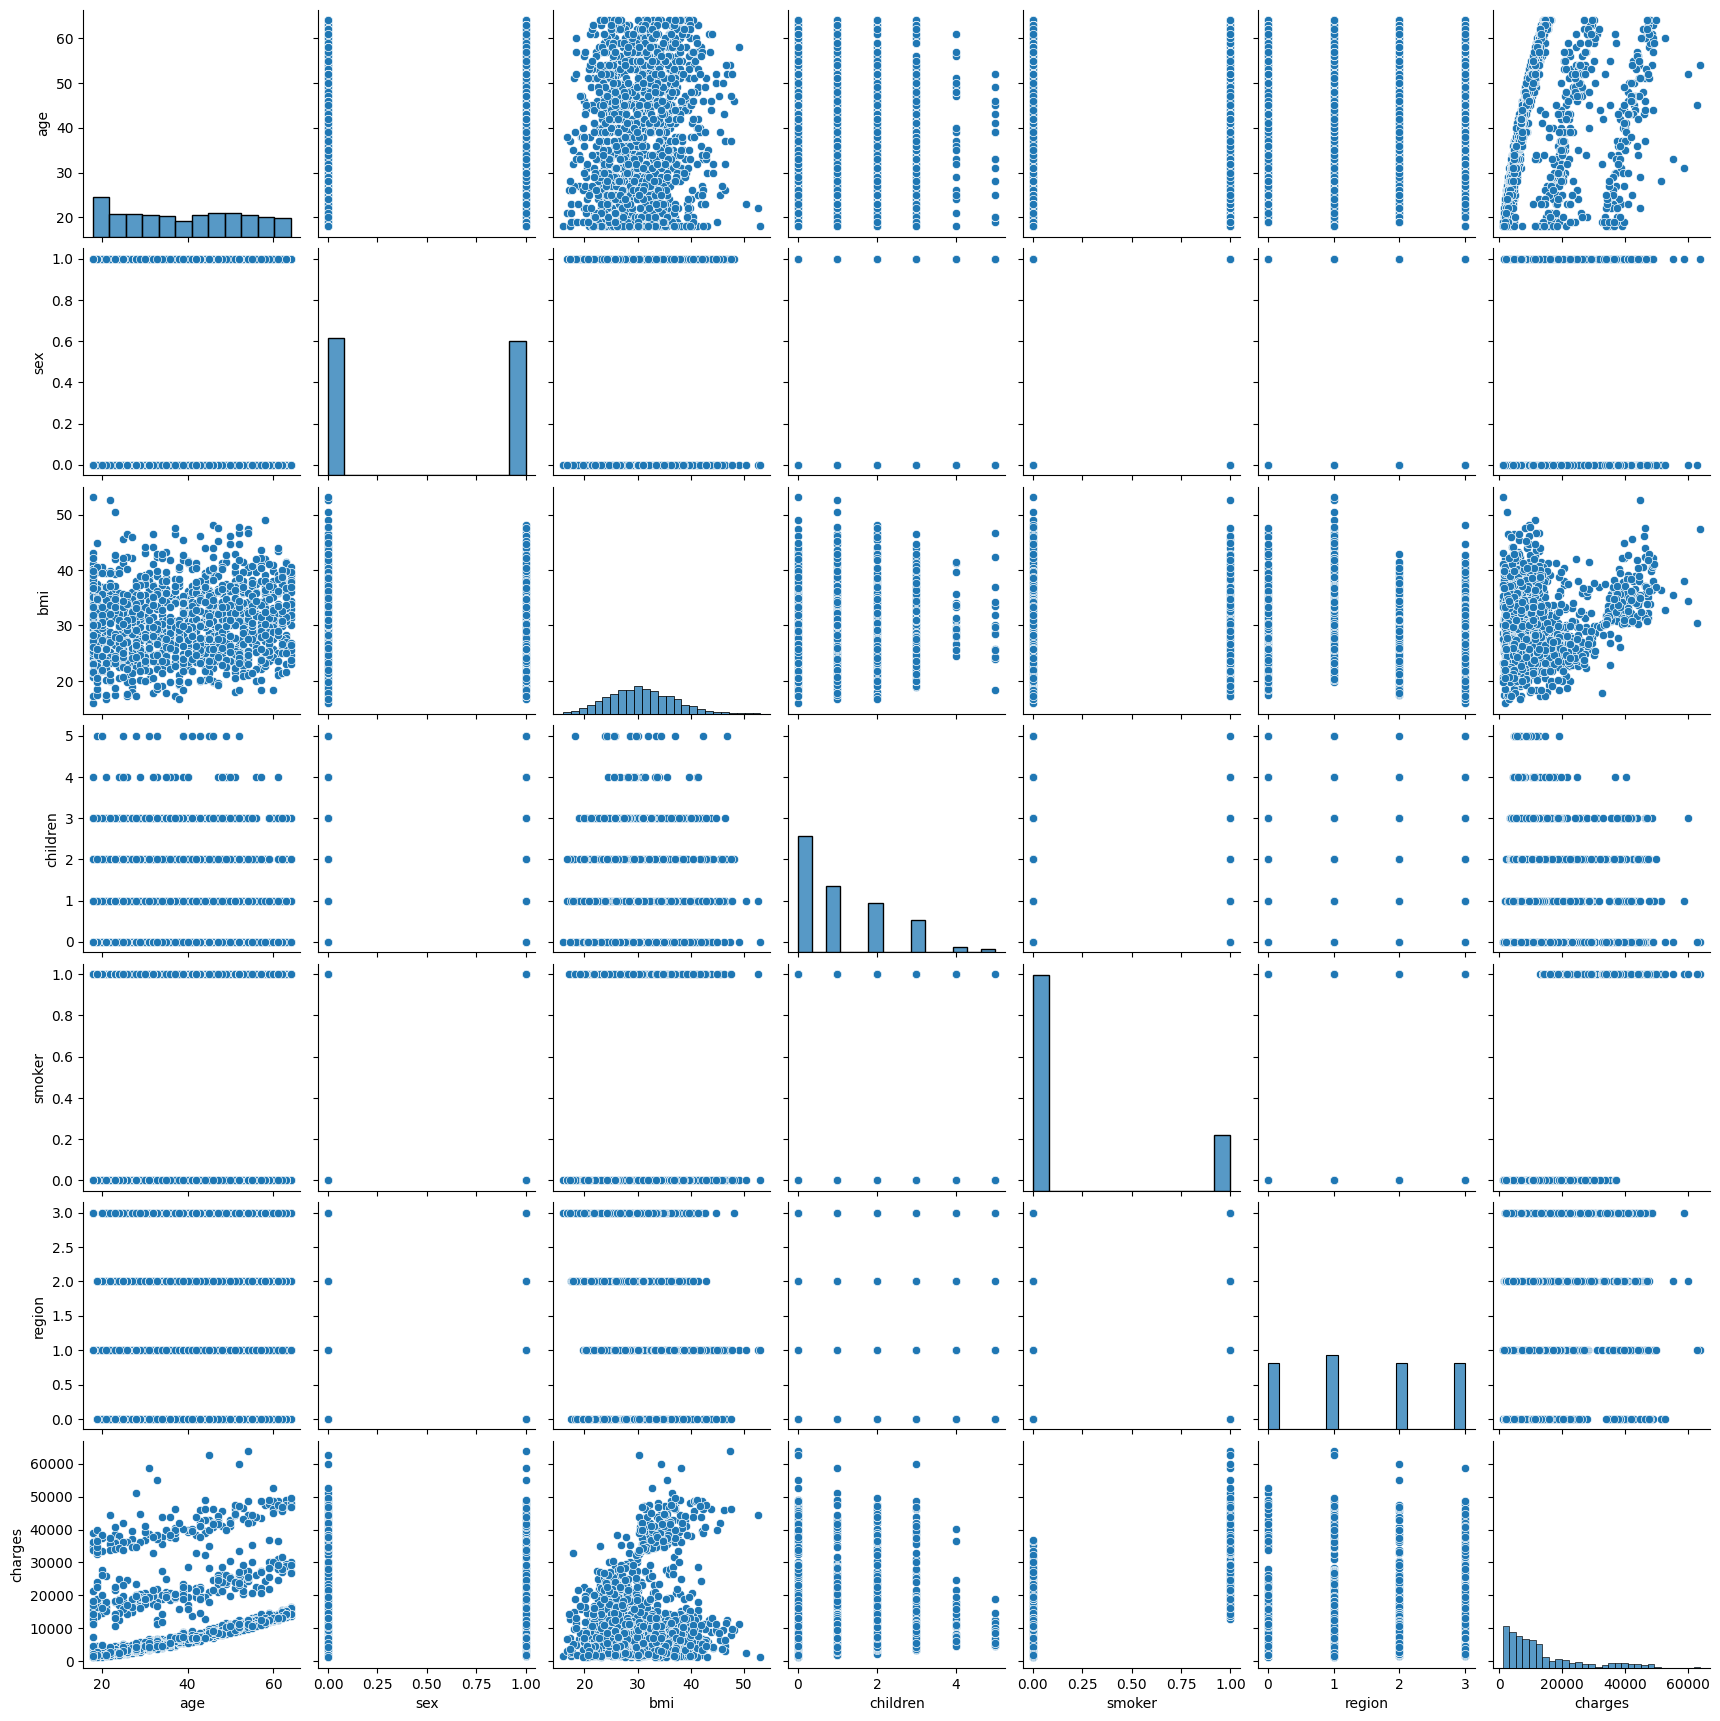

In [41]:
sns.pairplot(df_clean)
plt.show()

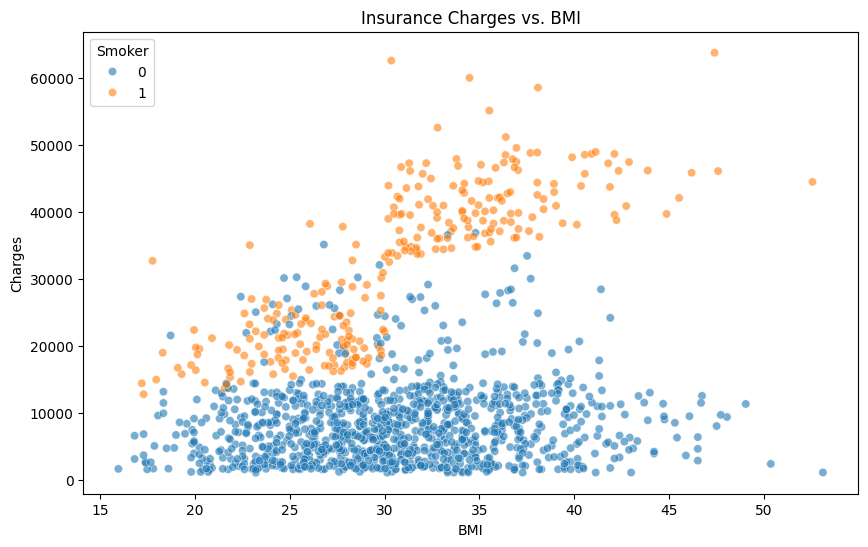

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df_clean, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('Insurance Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper left')
plt.show()

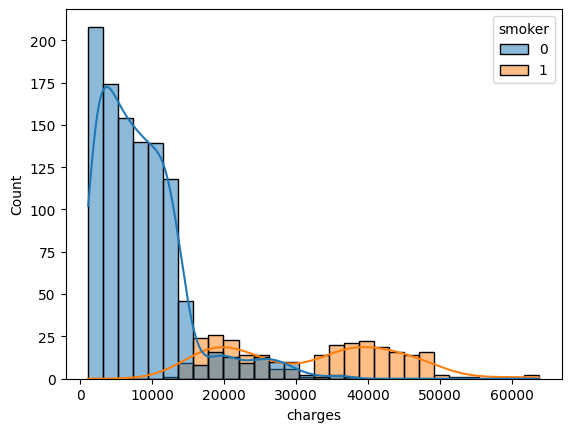

In [43]:
sns.histplot(data=df_clean, x="charges", hue="smoker", bins=30, kde=True)
plt.show()


##6. Splitting & Training The Models

In [54]:
# Initially Trying Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



X = df_clean.drop("charges", axis=1)
y = df_clean["charges"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Linear Regression evaluation

print(f"R2: {model.score(X_test, y_test)}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")


R2: 0.7833463107364539
MSE: 33635210.431178406


In [78]:
# Trying polynomial regression for improvement

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"R2: {model.score(X_test, y_test)}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")


R2: 0.867756671853774
MSE: 20530608.94295193


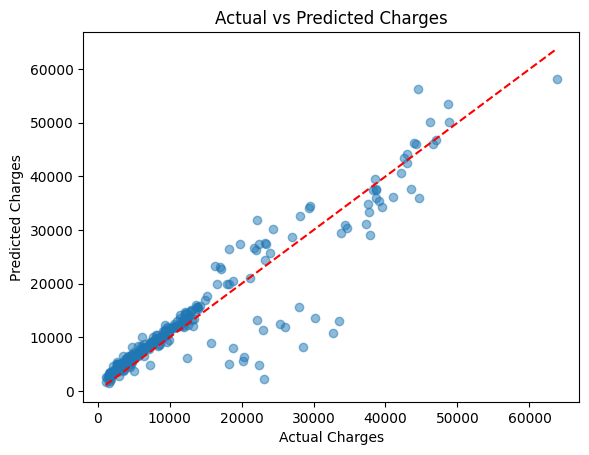

In [79]:
# Checking The Prediction Graph

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()


##7. Comparing Multiple Regression Models

In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd


X = df_clean.drop("charges", axis=1)
y = df_clean["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),

    'Ridge Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge(alpha=1.0))
    ]),

    'Lasso Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(alpha=0.1))
    ]),


    'Polynomial Regression (deg=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),

    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),

    'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
}


In [81]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R-squared': r2
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R-squared', ascending=False)
display(results_df)



,Model,Mean Absolute Error,Mean Squared Error,R-squared
5,XGBoost,2475.341943,2.042959e+07,0.868407
3,Polynomial Regression (deg=2),2730.315582,2.053061e+07,0.867757
4,Random Forest,2531.758625,2.118464e+07,0.863544
0,Linear Regression,4186.508898,3.363521e+07,0.783346
2,Lasso Regression,4186.520497,3.363547e+07,0.783345
1,Ridge Regression,4187.971685,3.364182e+07,0.783304


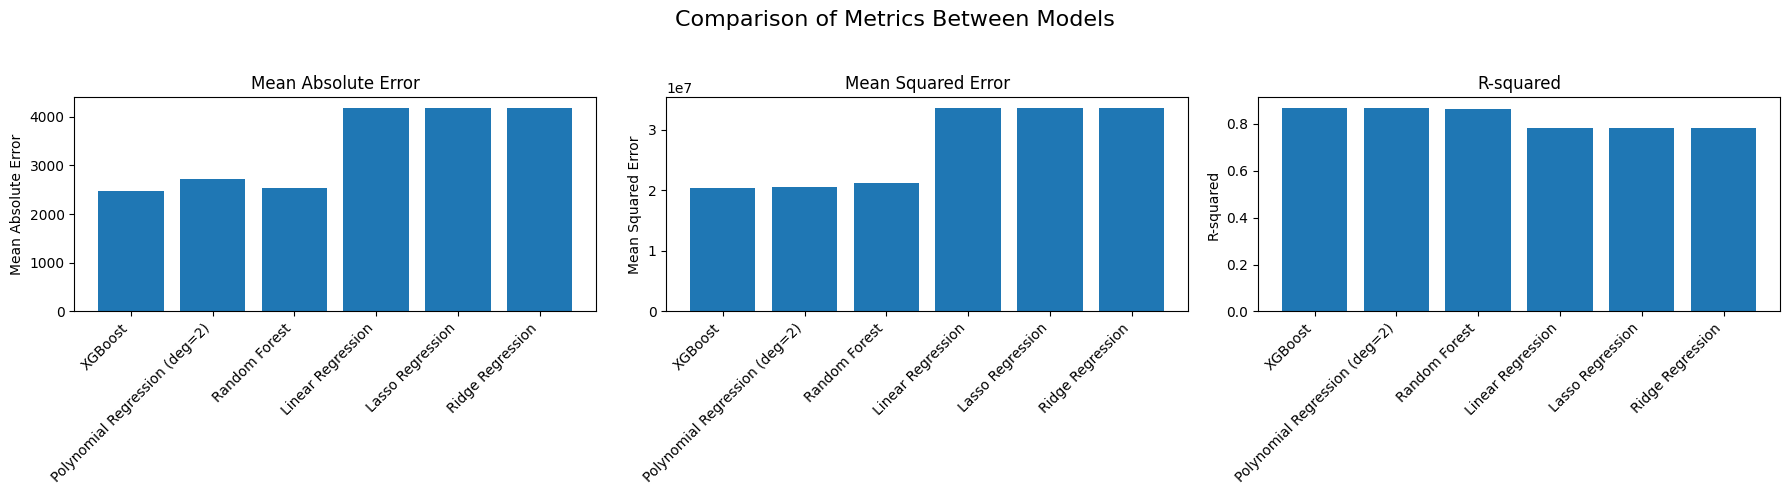

In [88]:
# Plotting The Comparison Between Models

plot_df = results_df.copy()
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
models = plot_df['Model'].values
x = np.arange(len(models))

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5), sharey=False)

for ax, metric in zip(axes, metrics):
    ax.bar(x, plot_df[metric].values)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylabel(metric)
    ax.set_title(metric)

fig.suptitle('Comparison of Metrics Between Models', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 🧠 Final Analysis & Conclusion

After training and evaluating multiple regression models to predict insurance charges, the results clearly show that:

- **XGBoost Regressor** outperformed all other models with the highest R² score (≈ 0.87), lowest MAE, and lowest MSE.
- **Polynomial Regression (degree=2)** also showed strong performance, suggesting non-linear relationships in the data.
- Simpler models like **Linear, Ridge, and Lasso Regression** underperformed compared to ensemble methods.

### 🔍 Key Observations:
- The feature with the **strongest positive correlation** to insurance charges was `smoker`, followed by `age` and `BMI`.
- **Data preprocessing** (e.g., encoding and scaling) was essential to ensure fair model comparisons.
- **Tree-based models** like Random Forest and XGBoost handled the data complexity better without requiring feature transformation.

### ✅ Conclusion:
For practical use, **XGBoost is the best choice** for this dataset, offering both accuracy and flexibility. This analysis also reinforces the importance of testing multiple models and not relying solely on linear assumptions when predicting real-world outcomes.
